In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error

## Obtaining the Data

Source: Downloaded from [Kaggle California Housing Prices](https://www.kaggle.com/datasets/camnugent/california-housing-prices/data)

In [2]:
housing = pd.read_csv('../../data/housing.csv')

## Exploratory Data Analysis (EDA)

 An approach to analyzing data sets to summarize their main characteristics, often with visual methods.

In [3]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


<Axes: xlabel='median_income', ylabel='median_house_value'>

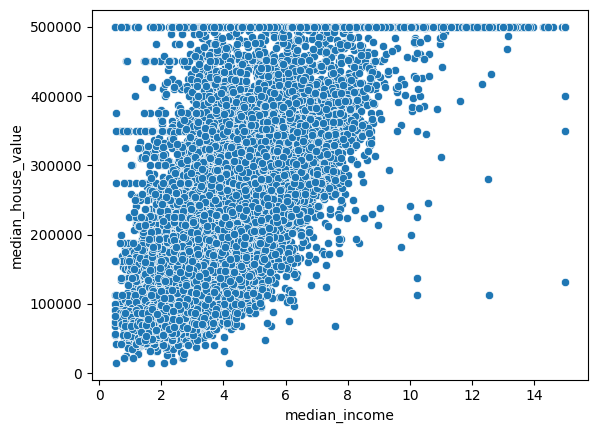

In [4]:
sns.scatterplot(x="median_income", y="median_house_value", data=housing)


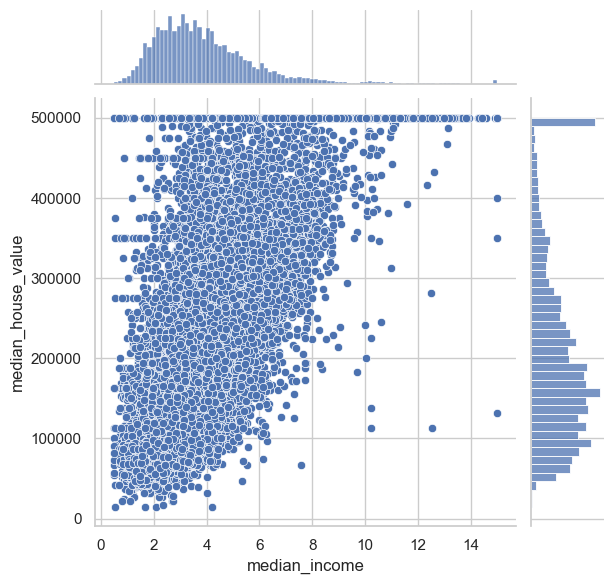

In [5]:
# using seaborn scatter plot, plot the median_house_value vs median_income

sns.set(style="whitegrid", color_codes=True)
sns.jointplot(x="median_income", y="median_house_value", data=housing)


# Data Preprocessing

Filter out records with median_house_value = 500001 since it seems to be a cap for the median_house_value.

In [6]:
housing_preprocessed = housing[housing.median_house_value != 500001]

In [7]:
print(f"After filtering, there are {len(housing_preprocessed)} records, versus {len(housing)} before filtering")

After filtering, there are 19675 records, versus 20640 before filtering


Let's plot the same jointplot one more time to visualize the difference.

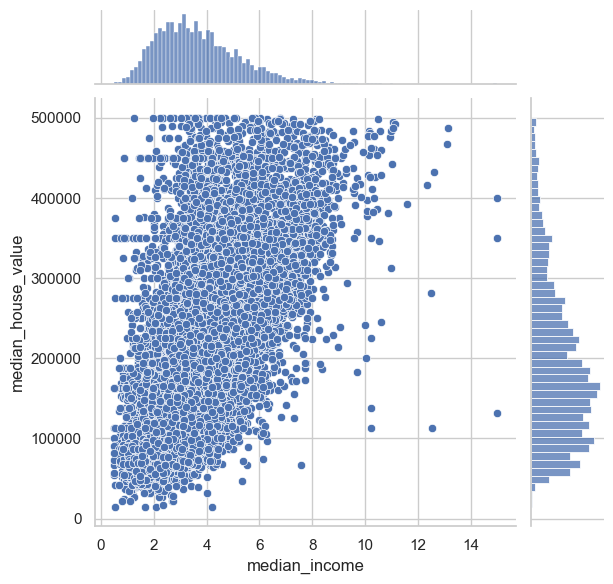

In [8]:
sns.set(style="whitegrid", color_codes=True)
sns.jointplot(x="median_income", y="median_house_value", data=housing_preprocessed)

# Train and Test Split

Split the data into training/testing sets. 
Use the first 80% of the data for training.

In [9]:
train_size = int(len(housing_preprocessed) * 0.8)
train = housing_preprocessed[:train_size]
test = housing_preprocessed[train_size:]

Scatter plot, train in blue and test in red in the same plot


<Axes: xlabel='median_income', ylabel='median_house_value'>

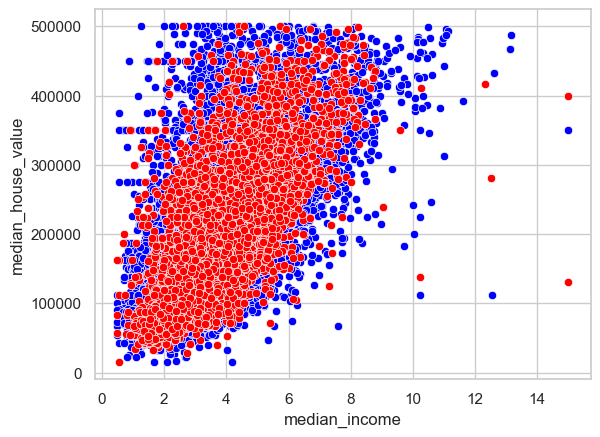

In [10]:
sns.scatterplot(x="median_income", y="median_house_value", data=train, color="blue")
sns.scatterplot(x="median_income", y="median_house_value", data=test, color="red")

# Define a Model

Create a linear regression object

In [11]:
model = linear_model.LinearRegression()

# Train the Model

In [12]:
# fit
model.fit(X=train[["median_income"]], y=train[["median_house_value"]])

LinearRegression()

# Evaluate the Model

For the Train and Test data:

* Print the slope and intercept
* Plot the regression line on top of the scatter plot of the training data
* Print the Mean Squared Error (MSE) and the Mean Absolute Error (MAE)

In [18]:
# print coefficients
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")

Intercept: [48204.53436817]
Coefficients: [[38702.97233842]]


In [21]:
12*model.coef_ + model.intercept_

array([[512640.20242926]])

In [23]:
model.predict(X=[[12],[1],[100]])

c:\Users\ranfe\Documents\Code\courses\conestoga-aaiml-2023-spring\CSCN8010\venv\CSCN8010_classic_ml\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[ 512640.20242926],
       [  86907.50670659],
       [3918501.76821055]])

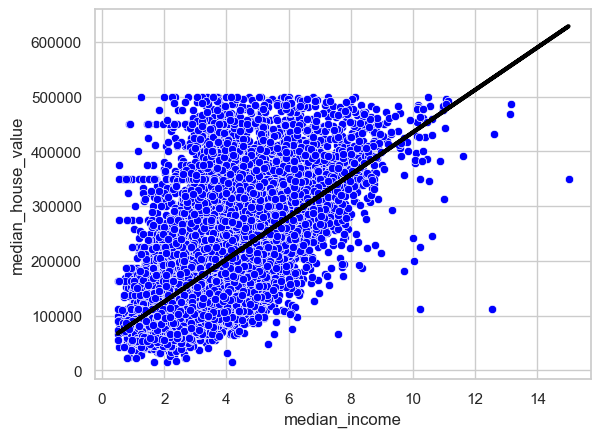

In [14]:
# plot the regression line against the training data
sns.scatterplot(x="median_income", y="median_house_value", data=train, color="blue")
plt.plot(train[["median_income"]], model.predict(train[["median_income"]]), color="black", linewidth=3)
plt.show()


In [15]:
# print the MSE and MAE on the train set
print("Train set")
print(f"Mean squared error: {mean_squared_error(train[['median_house_value']], model.predict(train[['median_income']]))}")
print(f"Mean absolute error: {mean_absolute_error(train[['median_house_value']], model.predict(train[['median_income']]))}")

Train set
Mean squared error: 5557954319.259176
Mean absolute error: 55839.99864072871


In [16]:
# print the MSE and MAE on the test set
print("Test set")
print(f"Mean squared error: {mean_squared_error(test[['median_house_value']], model.predict(test[['median_income']]))}")
print(f"Mean absolute error: {mean_absolute_error(test[['median_house_value']], model.predict(test[['median_income']]))}")


Test set
Mean squared error: 5831038297.419372
Mean absolute error: 59961.60099129183


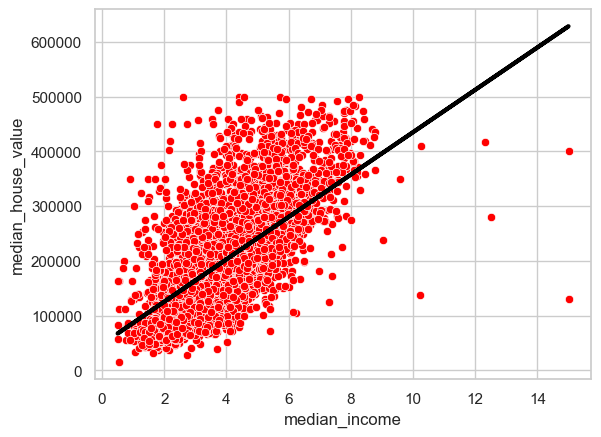

In [17]:
# plot the regression line against the test data
sns.scatterplot(x="median_income", y="median_house_value", data=test, color="red")
plt.plot(test[["median_income"]], model.predict(test[["median_income"]]), color="black", linewidth=3)